In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy.linalg import eigh, inv
from numpy import vstack
from matplotlib import pyplot as plt

In [3]:
Xₒ = np.array([	[-2,1],
				[0,3],
				[1,4],
				[1,5],
				[2,5]])

In [4]:
Xₗ = np.array([	[0,0],
				[1,1],
				[2,1],
				[3,2],
				[4,3]])

In [5]:
X = np.vstack((Xₒ, Xₗ))

	Solving LDA

In [6]:
C = np.eye(5) - (1/5)*np.ones((5,5))

In [7]:
cₒ = np.reshape(np.mean(Xₒ, axis=0),(2,1))
cₗ = np.reshape(np.mean(Xₗ, axis=0),(2,1))
u = cₒ - cₗ
Sₗ = u.dot(u.T)
Sշ = Xₒ.T.dot(C).dot(Xₒ) + Xₗ.T.dot(C).dot(Xₗ) 
Q = inv(Sշ).dot(Sₗ)
[D,V] = eigh(Q)
ṽ = np.reshape(V[:,1], (2,1))

Project the data onto the LDA line

In [8]:
Xₒᴾ = Xₒ.dot(ṽ).dot(ṽ.T)		# data after LDA projection
Xₗᴾ = Xₗ.dot(ṽ).dot(ṽ.T)		# data after LDA projection

In [9]:
linePoints = vstack((5*ṽ.T, -5*ṽ.T))

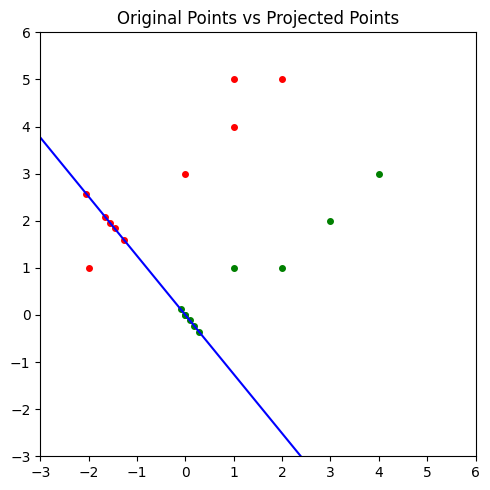

In [10]:
plt.figure(figsize = (5, 5))
plt.plot(linePoints[:,0], linePoints[:,1], color='blue')
plt.scatter(Xₒ[:,0], Xₒ[:,1], color='red', s=16)
plt.scatter(Xₒᴾ[:,0], Xₒᴾ[:,1], color='red', s=16)
plt.scatter(Xₗ[:,0], Xₗ[:,1], color='green', s=16)
plt.scatter(Xₗᴾ[:,0], Xₗᴾ[:,1], color='green', s=16)
plt.xlim([-3,6])
plt.ylim([-3,6])
plt.title('Original Points vs Projected Points')
plt.tight_layout()
plt.show()